In [2]:
using Revise

using Pkg; Pkg.activate("..")

using Dates
using NCDatasets

using PyPlot

include("VaporSat.jl")
using .VaporSat

  Activating project at `~/Projects/submersible_humidity_sensor`


### Emerson's tests in WFIP

```
Humditiy sensor test 20241118

17:17:43 - dunk/wet - but not turned on
17:18:52 - unit turned on - fresh dunk/wet
17:38:39 - dunk/wet
17:58:13 - dunk/wet
18:09:28 - dunk/wet
18:20:53 - recovery (dunk on recovery)

SHS test 20241120

1627 sensor turned on
1628 sensor dunk
1633 dunk
1637 dunk
1642 dunk
1648 dunk
1653 dunk
1659 dunk
1706 dunk
```


[Ground truth from WHOI Sentinel 2](https://uop.whoi.edu/realtime/WFIP_Sentinel.html?buoy=2)

#### solar zenith angle
https://gml.noaa.gov/grad/antuv/SolarCalc.jsp

at 41 N, 71 W

Uses unconventional positive-westward longitude.

Local UTC     SolarZen and Elev Uncorrected for Atmospheric Refaction
yyyy MM dd HH:mm      AirMass   SolarZen       Elev       Azim
2024 11 18 10:00     -1.00000  107.95824  -17.95824  100.39899
2024 11 18 11:00     -1.00000   97.04282   -7.04282  109.62685
2024 11 18 12:00     13.68475   86.75574    3.24426  119.34954
2024 11 18 13:00      4.49520   77.46281   12.53719  130.12318
2024 11 18 14:00      2.84926   69.64151   20.35849  142.42005
2024 11 18 15:00      2.26057   63.88741   26.11259  156.49046
2024 11 18 16:00      2.04317   60.82246   29.17754  172.08539
2024 11 18 17:00      2.04613   60.86912   29.13088  188.28681
2024 11 18 18:00      2.27120   64.02046   25.97954  203.84507
2024 11 18 19:00      2.87619   69.84451   20.15549  217.85966
2024 11 18 20:00      4.58219   77.71763   12.28237  230.09968
2024 11 18 21:00     14.52076   87.04734    2.95266  240.82465
2024 11 18 22:00     -1.00000   97.36031   -7.36031  250.50918

In [3]:
# encode the notes
notetimestr = split(
"""
2024-11-18T17:17:43
2024-11-18T17:18:52
2024-11-18T17:38:39
2024-11-18T17:58:13
2024-11-18T18:09:28
2024-11-18T18:20:53
""")

notes = split(
"""
dunk/wet - but not turned on
unit turned on - fresh dunk/wet
dunk/wet
dunk/wet
dunk/wet
recovery (dunk on recovery)
"""
)
notetime = DateTime.(notetimestr)

6-element Vector{DateTime}:
 2024-11-18T17:17:43
 2024-11-18T17:18:52
 2024-11-18T17:38:39
 2024-11-18T17:58:13
 2024-11-18T18:09:28
 2024-11-18T18:20:53

In [4]:
datadir = "../data/Field20241118"
ds = NCDataset(joinpath(datadir, "233860_20241118_1826.nc"))

Dataset: ../data/Field20241118/233860_20241118_1826.nc
Group: /

Dimensions
   time = 7491
   parameters = 1

Variables
  time   (7491)
    Datatype:    Union{Missing, DateTime} (Float64)
    Dimensions:  time
    Attributes:
     long_name            = Time
     units                = milliseconds since 1970-01-01 00:00:00 Z
     timezone             = Z
     missing_value        = NaN
     notes                = milliseconds since epoch

  temperature   (7491)
    Datatype:    Float64 (Float64)
    Dimensions:  time
    Attributes:
     standard_name        = sea_water_temperature
     long_name            = In-situ Temperature
     units                = Celsius
     origin               = Measured
     sensor               = Tstring
     coordinates          = time
     calibration_C0       = 0.00352724
     calibration_C1       = -0.00025053485
     calibration_C2       = 2.571511e-6
     calibration_C3       = -9.285641e-8

  temperature1   (7491)
    Datatype:    Float64 (Float6

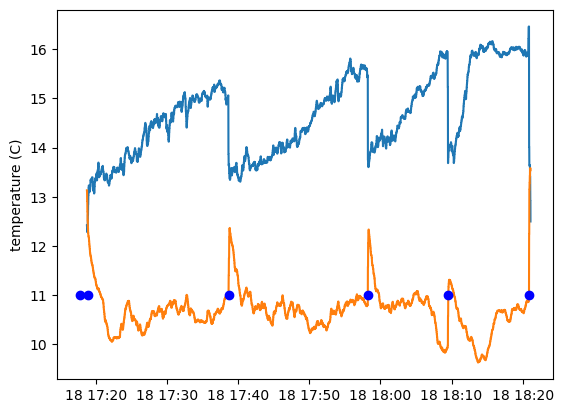

In [5]:
ii = ds[:time][:] .> DateTime(2024,11,18,12)

clf()
plot(ds[:time][ii], ds[:temperature][ii])
plot(ds[:time][ii], ds[:temperature1][ii])
# plot(ds[:time][ii], ds[:temperature][ii].-1.0)
plot(notetime, 11.0.+zeros(length(notetime)), marker="o", linestyle="none", color="b")
ylabel("temperature (C)")
gcf()

In [6]:
Tw = Twet_autodiff(273.15 + 14.0, 0.60*qs(101000.0, 14.0), 101000.0) - 273.15

9.969053619581757

In [7]:
dunktimestr = """
1627
1628
1633
1637
1642
1648
1653
1659
1706
"""
dunknote = """
sensor turned on
sensor dunk
dunk
dunk
dunk
dunk
dunk
dunk
dunk
"""
dunktime = [ (DateTime(2024,11,20) - DateTime(1)) + 
              DateTime(str, dateformat"HHMM") for str in split(dunktimestr) ]

9-element Vector{DateTime}:
 2024-11-20T16:27:00
 2024-11-20T16:28:00
 2024-11-20T16:33:00
 2024-11-20T16:37:00
 2024-11-20T16:42:00
 2024-11-20T16:48:00
 2024-11-20T16:53:00
 2024-11-20T16:59:00
 2024-11-20T17:06:00

In [8]:
datadir = "../data/Field20241120"
ds = NCDataset(joinpath("../data/Field20241120","233860_20241121_2006.nc"))

Dataset: ../data/Field20241120/233860_20241121_2006.nc
Group: /

Dimensions
   time = 12478
   parameters = 1

Variables
  time   (12478)
    Datatype:    Union{Missing, DateTime} (Float64)
    Dimensions:  time
    Attributes:
     long_name            = Time
     units                = milliseconds since 1970-01-01 00:00:00 Z
     timezone             = Z
     missing_value        = NaN
     notes                = milliseconds since epoch

  temperature   (12478)
    Datatype:    Float64 (Float64)
    Dimensions:  time
    Attributes:
     standard_name        = sea_water_temperature
     long_name            = In-situ Temperature
     units                = Celsius
     origin               = Measured
     sensor               = Tstring
     coordinates          = time
     calibration_C0       = 0.00352724
     calibration_C1       = -0.00025053485
     calibration_C2       = 2.571511e-6
     calibration_C3       = -9.285641e-8

  temperature1   (12478)
    Datatype:    Float64 (Fl

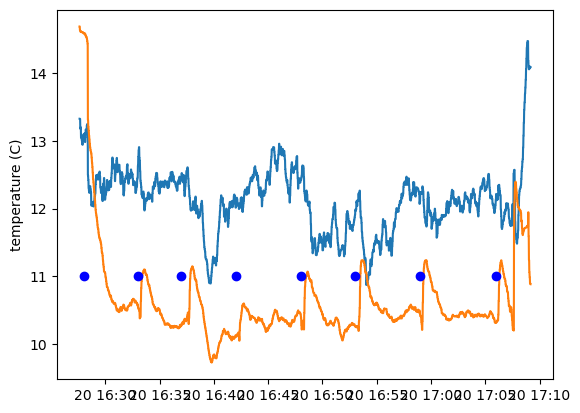

In [9]:
ii = ds[:time][:] .> DateTime(2024,11,20,12)

clf()
plot(ds[:time][ii], ds[:temperature][ii])
plot(ds[:time][ii], ds[:temperature1][ii])
# plot(ds[:time][ii], ds[:temperature][ii].-1.0)
plot(dunktime[2:end], 11.0.+zeros(length(dunktime)-1), marker="o", linestyle="none", color="b")
ylabel("temperature (C)")
gcf()

In [10]:
Tw = Twet_autodiff(273.15 + 11.0, 0.75*qs(101000.0, 11.0), 101000.0) - 273.15

8.777406164734657

In [ ]:
Millisecond.(ds[:time][ii] .- pd(dunktime[2:end])) / Millisecond(60_000)

4987×8 Matrix{Float64}:
 -0.00638889  -0.0897222  -0.156389  …  -0.423056  -0.523056  -0.639722
 -0.00625     -0.0895833  -0.15625      -0.422917  -0.522917  -0.639583
 -0.00611111  -0.0894444  -0.156111     -0.422778  -0.522778  -0.639444
 -0.00597222  -0.0893056  -0.155972     -0.422639  -0.522639  -0.639306
 -0.00583333  -0.0891667  -0.155833     -0.4225    -0.5225    -0.639167
 -0.00569444  -0.0890278  -0.155694  …  -0.422361  -0.522361  -0.639028
 -0.00555556  -0.0888889  -0.155556     -0.422222  -0.522222  -0.638889
 -0.00541667  -0.08875    -0.155417     -0.422083  -0.522083  -0.63875
 -0.00527778  -0.0886111  -0.155278     -0.421944  -0.521944  -0.638611
 -0.00513889  -0.0884722  -0.155139     -0.421806  -0.521806  -0.638472
  ⋮                                  ⋱   ⋮                    
  0.685        0.601667    0.535         0.268333   0.168333   0.0516667
  0.685139     0.601806    0.535139      0.268472   0.168472   0.0518056
  0.685278     0.601944    0.535278  …   0.26861

In [ ]:
pd = permutedims

clf()
# plot(ds[:time][ii], ds[:temperature1][ii])
plot(Millisecond.(ds[:time][ii] .- pd(dunktime[2:end])) / Millisecond(60_000), 
log.((ds[:temperature1][ii].-10.4)./0.6))
xlim([0,5])
ylim([2.8, 3])
gcf()

DomainError: DomainError with -0.03159866131060637:
log was called with a negative real argument but will only return a complex result if called with a complex argument. Try log(Complex(x)).